In [18]:
import numpy as np 

np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [36]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

def SGD_Logistic_Regression(w_init, eta, max_count=10000):
    w = [w_init]
    EPOCHS = 10
    N = X.shape[1]
    d = w_init.shape[0]
    count = 0
    while count < max_count:
        rd_id = np.random.permutation(N)
        for i in rd_id:
            count+=1
            xi = X[:,i].reshape((d, 1))
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi-zi)*xi
            w.append(w_new)
            if np.linalg.norm(w[-1]-w[-2]) < 1e-4:
                return w, count
            
    return w, count

d = X.shape[0]
w_init = np.random.randn(d, 1)

w, count = SGD_Logistic_Regression(w_init, .05)

print(w[-1])
print(sigmoid(np.dot(w[-1].T, X)))
print(count)

[[-4.12833004]
 [ 1.46348961]]
[[0.03240235 0.0460575  0.0650802  0.09120846 0.12640834 0.1726126
  0.1726126  0.231235   0.30248793 0.3847095  0.47408982 0.56516198
  0.65203837 0.72985432 0.84885239 0.89007435 0.92109897 0.94391912
  0.96042271 0.98056137]]
10000


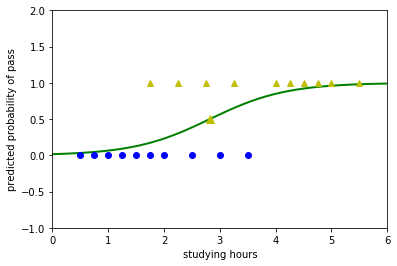

In [60]:
import matplotlib.pyplot as plt

X0 = X[1, np.where(y==0)][0]
y0 = y[np.where(y==0)]
X1 = X[1, np.where(y==1)][0]
y1 = y[np.where(y==1)]

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
# plt.show()

plt.plot(X0, y0, 'bo')
plt.plot(X1, y1, 'y^')
plt.axis([0, 6, -1, 2])
plt.show()